In [1]:
# github url : https://github.com/jai-mr/
# Assignment Repository : https://github.com/jai-mr/Assignment-9
# Submitted by : Jaideep Rangnekar
# Registered email id : jaideepmr@gmail.com

In [2]:
# Module Used
# data.py train.py test.py Albumentation.py summary_q.py utils.py QuizDNN.py

In [3]:
# Code follows for assignment
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-09-26 13:45:22.099640


In [4]:
from datetime import datetime
import pytz
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2020-09-26 19:15:25.883593+05:30


In [5]:
# Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
from google.colab import drive
drive.mount("/content/gdrive")
gdrivepath="gdrive/My Drive/Colab Notebooks/S9/"

Mounted at /content/gdrive


In [6]:
#! rm *.py
!cp "gdrive/My Drive/Colab Notebooks/S9/QuizDNN/Albumentation.py" Albumentation.py
!cp "gdrive/My Drive/Colab Notebooks/S9/QuizDNN/data.py" data.py
!cp "gdrive/My Drive/Colab Notebooks/S9/QuizDNN/test.py" test.py
!cp "gdrive/My Drive/Colab Notebooks/S9/QuizDNN/QuizDNN.py" QuizDNN.py
!cp "gdrive/My Drive/Colab Notebooks/S9/QuizDNN/train.py" train.py
!cp "gdrive/My Drive/Colab Notebooks/S9/QuizDNN/summary_q.py" summary_q.py
!cp "gdrive/My Drive/Colab Notebooks/S9/QuizDNN/utils.py" utils.py

!ls 

Albumentation.py  gdrive      sample_data   test.py   utils.py
data.py		  QuizDNN.py  summary_q.py  train.py


In [7]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For Reproducibility
torch.manual_seed(1)

if cuda:
    torch.cuda.manual_seed(1)
print(torch.cuda.get_device_name(0))

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")


CUDA Available? True
Tesla T4


CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


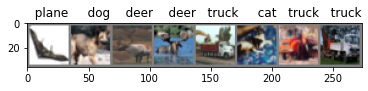

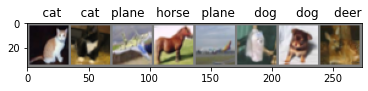

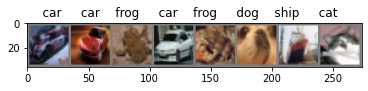

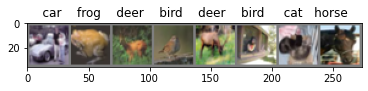

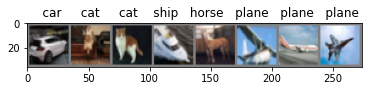

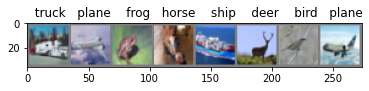

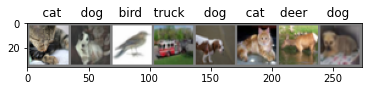

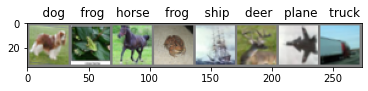

In [8]:
import Albumentation

import data
train_loader, test_loader = data.loader(128)
data.display()

In [9]:
import QuizDNN as q

In [10]:
!pip install torchsummary
import summary_q as summary
summary.summ(device)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [11]:
import train as tr
import test as te

In [12]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR


model = q.Net().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

epochs = 10

for epoch in range(epochs):
  print('EPOCH: ', epoch+1)
  tr.train(model, device, train_loader, optimizer, epoch)
  #scheduler.step()
  te.test(model, device, test_loader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  1


Loss=1.2039854526519775 Batch_id=390 Accuracy=48.78: 100%|██████████| 391/391 [00:24<00:00, 16.18it/s]



Test set: Average loss: 0.0096, Accuracy: 5609/10000 (56.09%)



  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  2


Loss=0.9753822088241577 Batch_id=390 Accuracy=65.11: 100%|██████████| 391/391 [00:24<00:00, 16.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6508/10000 (65.08%)

EPOCH:  3


Loss=0.7274290919303894 Batch_id=390 Accuracy=71.35: 100%|██████████| 391/391 [00:24<00:00, 16.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7243/10000 (72.43%)

EPOCH:  4


Loss=0.510267972946167 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:24<00:00, 16.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7527/10000 (75.27%)

EPOCH:  5


Loss=0.4662707448005676 Batch_id=390 Accuracy=78.59: 100%|██████████| 391/391 [00:24<00:00, 16.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7816/10000 (78.16%)

EPOCH:  6


Loss=0.5600641965866089 Batch_id=390 Accuracy=80.50: 100%|██████████| 391/391 [00:24<00:00, 16.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7924/10000 (79.24%)

EPOCH:  7


Loss=0.6078398823738098 Batch_id=390 Accuracy=82.22: 100%|██████████| 391/391 [00:24<00:00, 15.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7830/10000 (78.30%)

EPOCH:  8


Loss=0.4467592239379883 Batch_id=390 Accuracy=83.22: 100%|██████████| 391/391 [00:24<00:00, 15.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7952/10000 (79.52%)

EPOCH:  9


Loss=0.42226749658584595 Batch_id=390 Accuracy=84.07: 100%|██████████| 391/391 [00:24<00:00, 15.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8246/10000 (82.46%)

EPOCH:  10


Loss=0.3994113504886627 Batch_id=390 Accuracy=84.85: 100%|██████████| 391/391 [00:24<00:00, 15.65it/s]



Test set: Average loss: 0.0039, Accuracy: 8285/10000 (82.85%)




Test set: Average loss: -7.4801, Accuracy: 8285/10000 (82.85%)

(1715, 32, 32, 3)


<Figure size 432x288 with 0 Axes>

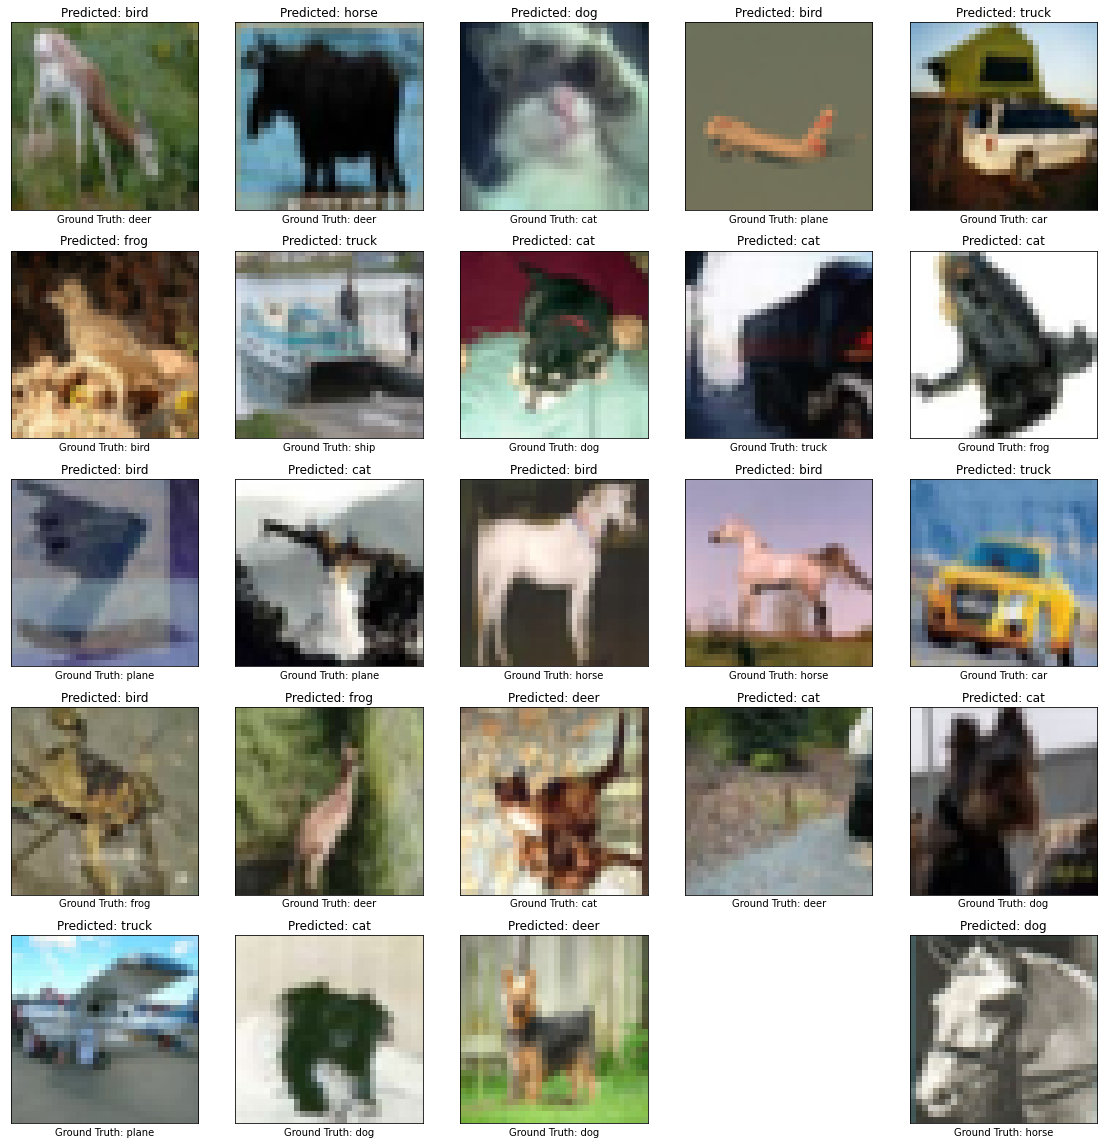

In [13]:
import utils as ut

path = gdrivepath + 'savedmodel/classifier.pt'
saved_model = q.Net().to(device)
saved_model.load_state_dict(torch.load(path))
saved_model.eval()
ut.mis(saved_model, device, test_loader, 25)

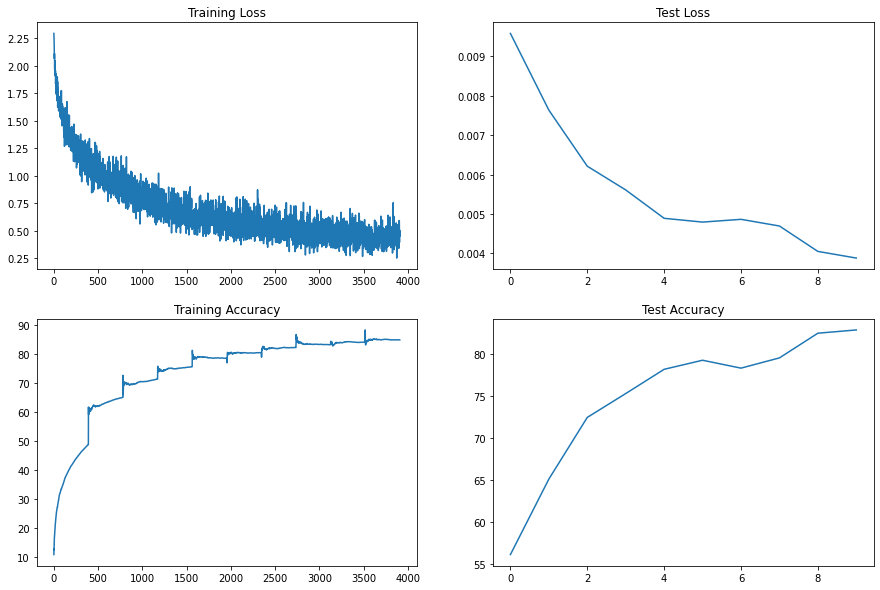

In [14]:
ut.graph()

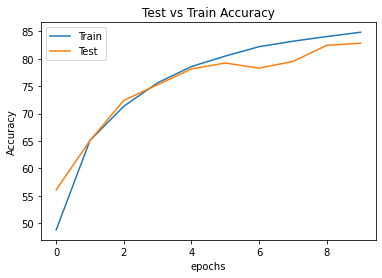

In [15]:
ut.testvtrain()

In [16]:
ut.class_acc(saved_model,device, test_loader)

Accuracy of plane : 82 %
Accuracy of   car : 89 %
Accuracy of  bird : 78 %
Accuracy of   cat : 75 %
Accuracy of  deer : 82 %
Accuracy of   dog : 70 %
Accuracy of  frog : 87 %
Accuracy of horse : 81 %
Accuracy of  ship : 87 %
Accuracy of truck : 93 %
